In [11]:
import pandas as pd
import numpy as np
import sweetviz as sv
from datetime import datetime
from tqdm import tqdm
import pickle
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
import nbformat

TIME_FMT = '%Y-%m-%dT%H:%M:%S.%f' # Still need [:-3] at the end

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
print("Pandas version: ", pd.__version__)

from platform import python_version
print("Python version: ", python_version())

print("nbformat version: ", nbformat.__version__)

Pandas version:  1.4.1
Python version:  3.10.0
nbformat version:  5.1.3


In [3]:
# includes info on games
df_games = pd.read_csv("./data/games.csv")

# includes play-by-play info on specific plays
df_plays = pd.read_csv("./data/plays.csv")

# includes background info for players
df_players = pd.read_csv("./data/players.csv")

# Reading tracking data (2018-2020)
df_tracking_2018 = pd.read_csv("./data/tracking2018.csv")
df_tracking_2019 = pd.read_csv("./data/tracking2019.csv")
df_tracking_2020 = pd.read_csv("./data/tracking2020.csv")

# Combine df_tracking_[x] into df_tracking for all years
df_tracking = pd.concat([df_tracking_2018, df_tracking_2019, df_tracking_2020], ignore_index=True)

# includes scouting info on specific plays
df_pff = pd.read_csv("./data/PFFScoutingData.csv")

## Sweetviz

In [11]:
# What's in the games csv?
df_games.head()

# Sweetviz
games_report = sv.analyze(df_games)
games_report.show_html('games.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report games.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
# What's in the plays csv?
df_plays.head()

# Sweetviz
plays_report = sv.analyze(df_plays)
plays_report.show_html('plays.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report plays.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
# Sweetviz for players
players_report = sv.analyze(df_players)
players_report.show_html('players.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report players.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [14]:
tracking_report = sv.analyze(df_tracking)
tracking_report.show_html('tracking.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report tracking.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
pff_report = sv.analyze(df_pff)
pff_report.show_html('pff.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report pff.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Remaining EDA / Ideas

In [4]:
# Idea - what is the optimal kickoff? Is it more beneficial to kick short of the end zone, and if so what kind of hangtime would you need on the ball?
df_plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,15:00:00,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,NaN,NaN,PHI,3,05:03:00,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,44979,NaN,ATL,35,05:01:00,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,NaN,NaN,PHI,35,00:33:00,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45


In [5]:
# Flatten to dataframe that only contains length of time for each play, as well as all events that happened, and playDirection
# Join keys = gameId, playId
df_tracking['combinedId'] = df_tracking['gameId'].astype(str) + df_tracking['playId'].astype(str)
df_plays['combinedId'] = df_plays['gameId'].astype(str) + df_plays['playId'].astype(str)

# Create df_kickoff, that exclusively contains plays that are kickoffs
df_kickoff = df_plays.loc[df_plays['specialTeamsPlayType'] == 'Kickoff']

print("Kickoff DF Shape: ", df_kickoff.shape)
df_kickoff.head()

Kickoff DF Shape:  (7843, 26)


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,combinedId
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,15:00:00,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45,201809060037
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,44979,NaN,ATL,35,05:01:00,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75,2018090600677
7,2018090600,1387,J.Elliott kicks 65 yards from PHI 35 to end zo...,2,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,06:09:00,NaN,NaN,NaN,3,3,NaN,72.0,NaN,40,75,20180906001387
9,2018090600,1606,M.Bosher kicks 68 yards from ATL 35 to PHI -3....,2,0,0,ATL,Kickoff,Return,37267.0,44979,NaN,ATL,35,02:08:00,OH,PHI 29,5.0,3,6,NaN,68.0,13.0,60,45,20180906001606
12,2018090600,2225,M.Bosher kicks 65 yards from ATL 35 to end zon...,3,0,0,ATL,Kickoff,Touchback,37267.0,NaN,NaN,ATL,35,15:00:00,NaN,NaN,NaN,3,6,NaN,71.0,NaN,40,45,20180906002225


In [6]:
df_kickoff.iloc[0]['playDescription']

'J.Elliott kicks 65 yards from PHI 35 to end zone, Touchback.'

In [7]:
df_tracking.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,team,frameId,gameId,playId,playDirection,combinedId
0,2018-12-30T21:25:32.200,41.32,29.45,4.36,1.33,0.43,130.42,128.44,None,39470.0,Justin Tucker,9.0,K,home,1,2018123000,36,right,201812300036
1,2018-12-30T21:25:32.300,41.68,29.17,4.59,1.24,0.45,128.59,127.81,None,39470.0,Justin Tucker,9.0,K,home,2,2018123000,36,right,201812300036
2,2018-12-30T21:25:32.400,42.05,28.88,4.74,0.99,0.47,124.47,128.15,None,39470.0,Justin Tucker,9.0,K,home,3,2018123000,36,right,201812300036
3,2018-12-30T21:25:32.500,42.43,28.59,4.87,0.71,0.48,126.02,127.35,None,39470.0,Justin Tucker,9.0,K,home,4,2018123000,36,right,201812300036
4,2018-12-30T21:25:32.600,42.84,28.31,4.96,0.79,0.50,131.71,124.75,None,39470.0,Justin Tucker,9.0,K,home,5,2018123000,36,right,201812300036


In [8]:
print(sorted(set(df_tracking.loc[(df_tracking['playId'] == 40) & (df_tracking['gameId'] == 2021010300)]['time'])))
# df_tracking.loc[(df_tracking['event'] == 'kick_received') & (df_tracking['gameId'] == 2021010300)]

# This means that you need to get the time from kickoff to other event (touchback, or kick_received) to get the hangtime

['2021-01-03T18:03:02.200', '2021-01-03T18:03:02.300', '2021-01-03T18:03:02.400', '2021-01-03T18:03:02.500', '2021-01-03T18:03:02.600', '2021-01-03T18:03:02.700', '2021-01-03T18:03:02.800', '2021-01-03T18:03:02.900', '2021-01-03T18:03:03.000', '2021-01-03T18:03:03.100', '2021-01-03T18:03:03.200', '2021-01-03T18:03:03.300', '2021-01-03T18:03:03.400', '2021-01-03T18:03:03.500', '2021-01-03T18:03:03.600', '2021-01-03T18:03:03.700', '2021-01-03T18:03:03.800', '2021-01-03T18:03:03.900', '2021-01-03T18:03:04.000', '2021-01-03T18:03:04.100', '2021-01-03T18:03:04.200', '2021-01-03T18:03:04.300', '2021-01-03T18:03:04.400', '2021-01-03T18:03:04.500', '2021-01-03T18:03:04.600', '2021-01-03T18:03:04.700', '2021-01-03T18:03:04.800', '2021-01-03T18:03:04.900', '2021-01-03T18:03:05.000', '2021-01-03T18:03:05.100', '2021-01-03T18:03:05.200', '2021-01-03T18:03:05.300', '2021-01-03T18:03:05.400', '2021-01-03T18:03:05.500', '2021-01-03T18:03:05.600', '2021-01-03T18:03:05.700', '2021-01-03T18:03:05.800', 

In [4]:
# For each combination of gameId and playId (combinedId), get the time of kickoff to time of kick_received as the time of the kick
# Then, also get the time of the play
# Finally, build a dataframe that has the following features:
# playId | gameId | playDirection | kickHangtime | overallPlayTime
# This dataframe will then be joined on the plays dataframe

# Check if you can get this from a pickle first - otherwise you'll have to run this block
try:
    with open('./data/pkl/df_play_length.pkl', 'rb') as f:
        df_play_length = pickle.load(f)

    assert len(df_play_length) > 0
    print("Loaded df_play_length from pickle file!")

except Exception as e:
    print("Exception found: ", e)
    print("Unable to load from pickle file - generating dataframe instead...")
    final_list = []
    for id in tqdm(list(set(df_kickoff['combinedId']))):
        print(f"combinedId: {id}")
        game_id = df_kickoff.loc[df_kickoff['combinedId'] == id]['gameId'].iloc[0]
        play_id = df_kickoff.loc[df_kickoff['combinedId'] == id]['playId'].iloc[0]

        print(f"gameId: {game_id}")
        print(f"playId: {play_id}")

        # Initialize tmp_dict, get play tracking
        tmp_dict = {}
        play_track_df = df_tracking.loc[df_tracking['combinedId'] == id].sort_values(by='time', ascending=True)

        # Check if it's an onside kick. If it is, then discard
        if('kickoff' not in list(play_track_df['event'])):
            print(f"Caught a non-kickoff on game ID {game_id} play ID {play_id}")
            continue

        # Check if a kick lands in some way (e.g. touchback, received)
        if not any(x in ['touchback', 'kick_received'] for x in list(play_track_df['event'])):
            print(f"Caught instance where no kickoff landing was recorded on game ID {game_id} play ID {play_id}")
            continue

        # First get the values that will be the same throughout the whole play_track_df
        tmp_dict['gameId'] = play_track_df.iloc[0]['gameId']
        tmp_dict['playId'] = play_track_df.iloc[0]['playId']
        tmp_dict['playDirection'] = play_track_df.iloc[0]['playDirection']

        # Next, calculate overallPlayTime
        tmp_dict['overallPlayTime'] = datetime.strptime(max(play_track_df['time'] + '000'), TIME_FMT) - datetime.strptime(min(play_track_df['time'] + '000'), TIME_FMT)

        # print(set(play_track_df['event']))

        # Next, calculate kickHangtime
        tmp_dict['kickHangtime'] = datetime.strptime(play_track_df.loc[play_track_df['event'].isin(['touchback', 'kick_received'])].iloc[0]['time'] + '000', TIME_FMT) - datetime.strptime(play_track_df.loc[play_track_df['event'] == 'kickoff'].iloc[0]['time'] + '000', TIME_FMT)

        final_list.append(tmp_dict)

        # print("FINAL LIST: ", final_list)

    df_play_length = pd.DataFrame(final_list)

    # Pickle the results so you don't have to run the previous cell again
    with open('./data/pkl/df_play_length.pkl', 'wb') as f:
        pickle.dump(df_play_length, f)
    
    print("Generated df_play_length from kickoff tracking dataframes!")

print("Shape: ", df_play_length.shape) 
df_play_length.head() 


Loaded df_play_length from pickle file!
Shape:  (7471, 5)


,gameId,playId,playDirection,overallPlayTime,kickHangtime
0,2020091306,1911,right,0 days 00:00:06.800000,0 days 00:00:04.100000
1,2020091310,2111,left,0 days 00:00:06.200000,0 days 00:00:04.700000
2,2020092706,3877,left,0 days 00:00:06.100000,0 days 00:00:04.200000
3,2020091300,1245,right,0 days 00:00:05.900000,0 days 00:00:04
4,2018112202,1627,right,0 days 00:00:05.400000,0 days 00:00:03.800000


In [22]:
# Now join new df_play_length with df_plays
df_kickoff_full = df_plays.merge(df_play_length, how='inner', on=['gameId', 'playId'])

print("df_kickoff_full shape: ", df_kickoff_full.shape)
df_kickoff_full.head()

df_kickoff_full shape:  (7471, 28)


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,playDirection,overallPlayTime,kickHangtime
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,15:00:00,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45,right,0 days 00:00:06.800000,0 days 00:00:04.900000
1,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,44979,NaN,ATL,35,05:01:00,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75,left,0 days 00:00:13.200000,0 days 00:00:04.200000
2,2018090600,1387,J.Elliott kicks 65 yards from PHI 35 to end zo...,2,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,06:09:00,NaN,NaN,NaN,3,3,NaN,72.0,NaN,40,75,left,0 days 00:00:06.600000,0 days 00:00:04.700000
3,2018090600,1606,M.Bosher kicks 68 yards from ATL 35 to PHI -3....,2,0,0,ATL,Kickoff,Return,37267.0,44979,NaN,ATL,35,02:08:00,OH,PHI 29,5.0,3,6,NaN,68.0,13.0,60,45,right,0 days 00:00:13,0 days 00:00:03.700000
4,2018090600,2225,M.Bosher kicks 65 yards from ATL 35 to end zon...,3,0,0,ATL,Kickoff,Touchback,37267.0,NaN,NaN,ATL,35,15:00:00,NaN,NaN,NaN,3,6,NaN,71.0,NaN,40,45,right,0 days 00:00:07.600000,0 days 00:00:05.700000


In [28]:
# What range of kickoff hangtimes are we looking at?
df_kickoff_full['kickHangtime'] = df_kickoff_full['kickHangtime'].dt.seconds + (df_kickoff_full['kickHangtime'].dt.microseconds / 1000000)

print("Minimum kick hangtime: ", min(df_kickoff_full['kickHangtime']))
print("Maximum kick hangtime: ", max(df_kickoff_full['kickHangtime']))

Minimum kick hangtime:  0.8
Maximum kick hangtime:  10.7


## Visualizations

In [30]:
# Distribution of kick hangtimes
fig = px.violin(df_kickoff_full, y='kickHangtime')
fig.show()

<AxesSubplot:xlabel='kickHangtime'>

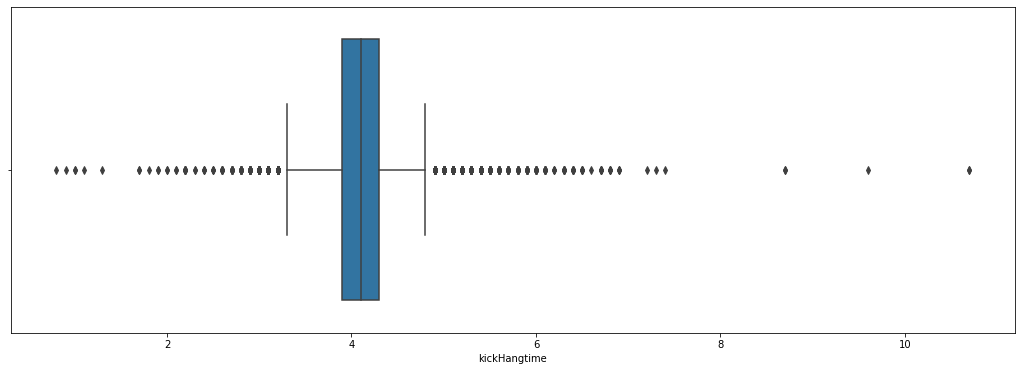

In [32]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxplot(data=df_kickoff_full, x='kickHangtime')

In [39]:
# Create penalty flag
df_kickoff_full['penaltyFlag'] = np.where(df_kickoff_full['penaltyCodes'].isna(), 0, 1)

# Create flag to see if the kickoff is "standard" - e.g. starts at the 35
df_kickoff_full['standardFlag'] = np.where(df_kickoff_full['yardlineNumber'] == 35, 1, 0)

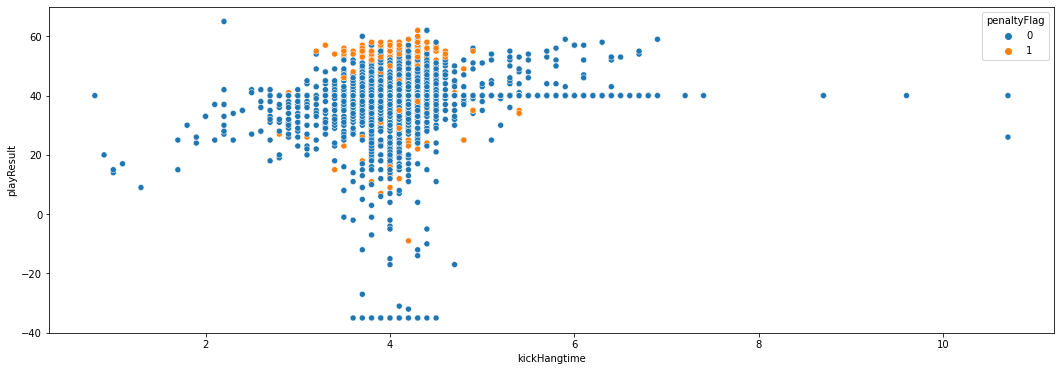

In [40]:
# playResult = net yards gained by the kicking team, including penalty yardage.
# Plot playResult vs. kickoff time

fig, ax = plt.subplots(figsize=(18, 6))
sns.scatterplot(data=df_kickoff_full.loc[df_kickoff_full['standardFlag'] == 1], x='kickHangtime', y='playResult', hue='penaltyFlag')
plt.show()

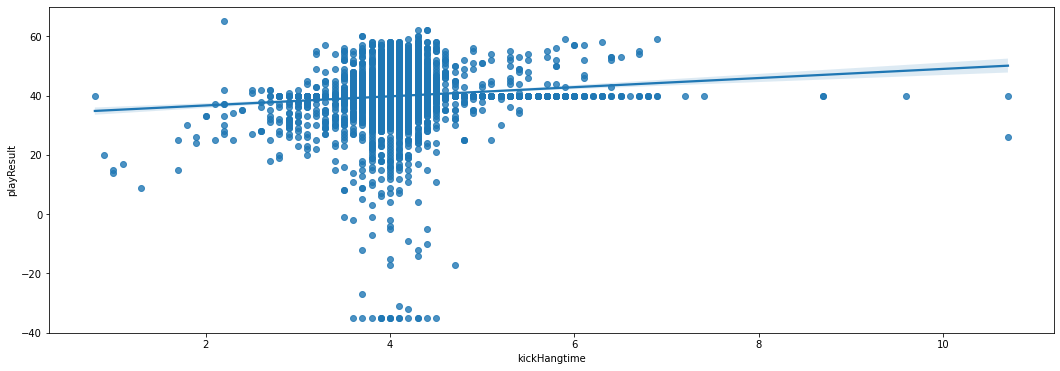

In [41]:
# Regression plot instead?

fig, ax = plt.subplots(figsize=(18, 6))
sns.regplot(data=df_kickoff_full.loc[df_kickoff_full['standardFlag'] == 1], x='kickHangtime', y='playResult')
plt.show()